<h1>Vitor Martins Soares</h1>
<h2>Neuro-Fuzzy NFN</h2>

<h3>
A rede neural fuzzy é uma rede neural simples, utilizando apenas algumas ideias de redes neurais como a multiplicação de entradas por um peso e a soma destes, algo parecido como um perceptron que ja foi estudado anteriormente, e então o recalculo dos pesos para melhorar o resultado quando ocorre um erro na previsão, utilizando a regra delta, o que foi diferente foi não ter uma função de ativação do reuronio central e o alfa (taixa de aprendizado) que foi utilizado o chamado alfa ótimo. A principal diferença é que as entradas da rede neural que são multiplicada pelos pesos, são valores resultantes das funções de pertinências fuzzy utilizando os valores iniciais do problema, isto é, se tivermos 3 entradas iniciais, e 3 funções de pertinências que, para cada entrada inicial geral outros 3 novos valores, o que totaliza 9 entradas na rede neural e 9 pesos para o calculo.</h3>

In [242]:
import os
import matplotlib.pyplot as plt
import random

<h3>Criando funções utilizadas no código Máximo, Mínimo e Triangular, que são utilizadas para a criação de funções de pertinencia das variáveis existentes no problema.</h3>

In [243]:
def triangular(x,a,m,b):
  y=maximo((minimo(((x-a)/(m-a),(b-x)/(b-m))),0))
  return y
def maximo(x):
  maior=0
  for i in x:
    if i > maior:
      maior = i
  return maior
def minimo(x):
  menor=x[0]
  for i in x:
    if i < menor:
      menor = i
  return menor

<h3>Criando as listas da função do tempo, o tempo de entrada e saida, foi pensado q, se existe 1854 entradas, o tempo total varia de 0 a 1854, porém os valores de x são de 0 a 1 e são muito pequenos, como precisamos dele no tempo, foi criado uma funcao com até 4 casas decimais e arredondamos o valor para melhor análise visual, porém isso ocorre algumas perdas de informação pois não estamos usando o valor real e sim seu arredondamento, mas isso causa uma melhora de custo.</h3>

In [244]:
listaFuncao = list()
for i in range(0,10000):
  listaFuncao.append((i+1)/10000)
listaY = list()
for i in range(0,1854):
  listaY.append(i)

<h3>Abrindo o arquvivo de saidas e armazenando em uma lista e plotando os valores no tempo.</h3>

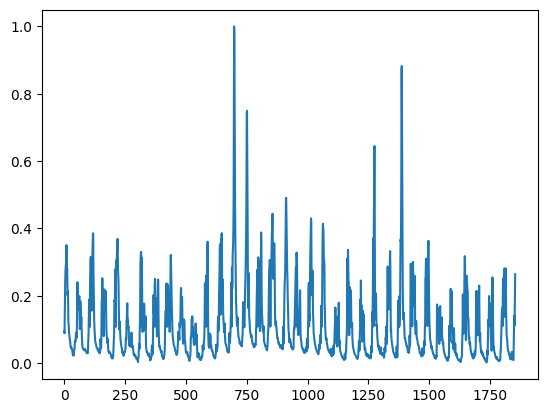

In [245]:
arqY = open("yt.xls")
saida = list()
for x in arqY:
  x = x.replace('\n','')
  x = x.split()
  saida.append(float(x[0]))
plt.plot(listaY, saida)
plt.show()

<h3>Abrindo o arquivo de entradas e armazenando em 3 listas e plotando os valores no tempo.</h3>

0.10744628
0.1613479
0.20054259


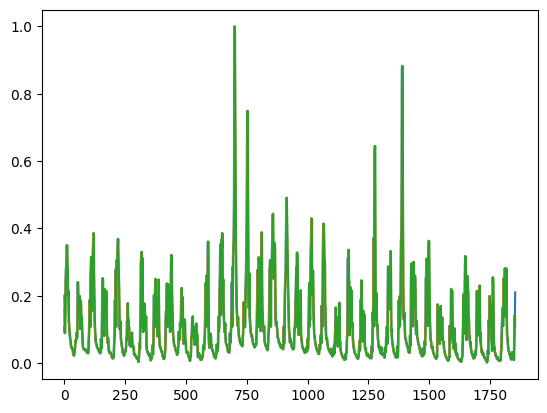

In [246]:
arqX = open("xt.xls")
x1 = list()
x2 = list()
x3 = list()
for x in arqX:
  x = x.replace('\n','')
  x = x.split()
  x1.append(float(x[0]))
  x2.append(float(x[1]))
  x3.append(float(x[2]))
print(x1[0])
print(x2[0])
print(x3[0])
plt.plot(listaY, x1)
plt.plot(listaY, x2)
plt.plot(listaY, x3)
plt.show()

<h3>Criando as funções de pertinencia ou funções de ativação, como os valores estão normalizados de 0 a 1 as funções foram criadas neste espaço, foi decidido utilizar 3 funções pois teve um ganho tão bom quanto usar mais que 3, como está normalizado de 0 a 1, uma função triangular de -1 a 0.5, com pico no 0, outra de 0 a 1, com pico em 0.5 e a ultima de 0.5 a 1.5 com pico no 1.</h3>

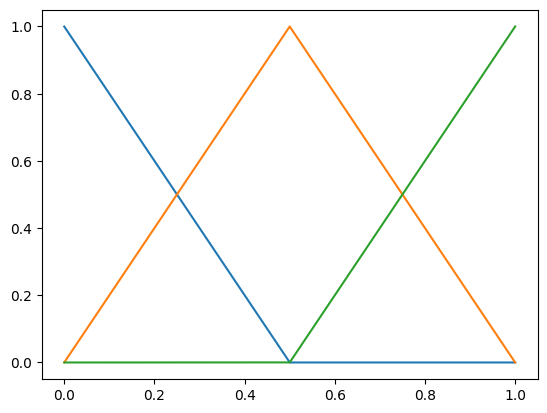

In [247]:
func1 = list()
for i in listaFuncao:
  func1.append(triangular(i,-1,0,0.5))
plt.plot(listaFuncao,func1)
func2 = list()
for i in listaFuncao:
  func2.append(triangular(i,0,0.5,1))
plt.plot(listaFuncao,func2)
func3 = list()
for i in listaFuncao:
  func3.append(triangular(i,0.5,1,-1))
plt.plot(listaFuncao,func3)
plt.show()

<h3>Calculando o alfa ótimo para todos os grupos de amostras, o alfa ótimo é um fixo e estático para toda a previsão, mudando apenas caso aumente a quantidade de funções de ativações ou adicione novas amostras.</h3>

In [248]:
apPerfeito = 0
somaTodos = 0
for x in listaY:
  somaTodos+=func1[listaFuncao.index(round(x1[x],4))]**2
  somaTodos+=func2[listaFuncao.index(round(x1[x],4))]**2
  somaTodos+=func3[listaFuncao.index(round(x1[x],4))]**2
  somaTodos+=func1[listaFuncao.index(round(x2[x],4))]**2
  somaTodos+=func2[listaFuncao.index(round(x2[x],4))]**2
  somaTodos+=func3[listaFuncao.index(round(x2[x],4))]**2
  somaTodos+=func1[listaFuncao.index(round(x3[x],4))]**2
  somaTodos+=func2[listaFuncao.index(round(x3[x],4))]**2
  somaTodos+=func3[listaFuncao.index(round(x3[x],4))]**2
apPerfeito = 1/somaTodos
print(apPerfeito)

0.00024141975336352034


<h3>Gerando pesos aleatorios entre 0 e 1 de todas as funções de ativações para todos as entradas Xi.</h3>

In [249]:
peso11 = random.uniform(0, 1)
peso12 = random.uniform(0, 1)
peso13 = random.uniform(0, 1)
peso21 = random.uniform(0, 1)
peso22 = random.uniform(0, 1)
peso23 = random.uniform(0, 1)
peso31 = random.uniform(0, 1)
peso32 = random.uniform(0, 1)
peso33 = random.uniform(0, 1)

<h3>Treinamento neuro-fuzzy NFN, é utilizado toda a base para este treinamento, podendo variar a quantidade de epocas de treinamento, porém estamos utilizando o alfa ótimo neste momento, que em teoria deveria ja ter uma aproximação e uma previsão boa. A cada amostra é calculado os valores de ativação de cada uma das entradas em cada uma das funções de ativações (3x3), com estes valores é calculado o valor de cada neuronio, que é a soma dos valores de ativação de uma determinada entrada vezes o seu peso que foi gerado aleatoriamente anteriormente, com o valor de cada neuronio é calculado então o valor previsto, que é o somatório dos neuronios gerados. Após receber este valor gerado, é calculado o erro, que foi calculado apartir do valor de saida real subtraido pelo valor previsto. Após saber qual é o erro, os pesos são recalculados utilizando algo simila a regra delta em que o novo peso é o peso antigo somado à multiplicação do erro pelo valor de ativação ligado a aquele peso e pelo o alfa ótimo. O alfa ótimo é um valor de taixa de aprendizado calculado a cada amostra sendo treinada, a ideia dele é para que não aja muitas epocas de treinamento, o certo seria que em uma epoca ele ja faça um bom treinamento e a previsão ja se saia bem, para calcular este alfa, a cada amostra, soma-se os valores de ativação de cada uma das entradas e cada uma das funções de ativações ao quadrado, e então divide 1 por esta soma, temos então o alfa ótimo.</h3> 

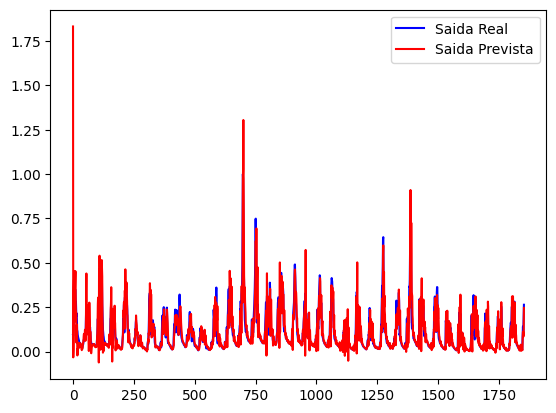

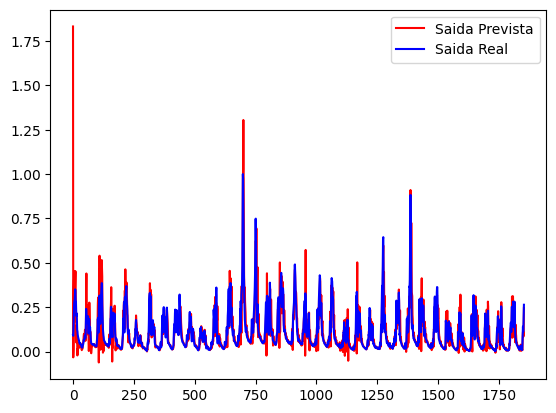

In [250]:
for t in range(0,1):
  previsto = list()
  for x in listaY:
    somaTodos = 0
    fuzzy11 = func1[listaFuncao.index(round(x1[x],4))]
    fuzzy12 = func2[listaFuncao.index(round(x1[x],4))]
    fuzzy13 = func3[listaFuncao.index(round(x1[x],4))]
    fuzzy21 = func1[listaFuncao.index(round(x2[x],4))]
    fuzzy22 = func2[listaFuncao.index(round(x2[x],4))]
    fuzzy23 = func3[listaFuncao.index(round(x2[x],4))]
    fuzzy31 = func1[listaFuncao.index(round(x3[x],4))]
    fuzzy32 = func2[listaFuncao.index(round(x3[x],4))]
    fuzzy33 = func3[listaFuncao.index(round(x3[x],4))]
    somaTodos = fuzzy11**2+fuzzy12**2+fuzzy13**2+fuzzy21**2+fuzzy22**2+fuzzy23**2+fuzzy31**2+fuzzy32**2+fuzzy33**2
    ap = 1/somaTodos

    neuroniox1 = peso11*fuzzy11+peso12*fuzzy12+peso13*fuzzy13
    neuroniox2 = peso21*fuzzy21+peso22*fuzzy22+peso23*fuzzy23
    neuroniox3 = peso31*fuzzy31+peso32*fuzzy32+peso33*fuzzy33
    somatorio = neuroniox1+neuroniox2+neuroniox3

    previsto.append(somatorio)
    erro = -somatorio+saida[x]
    #regradelta
    peso11 = peso11 + (fuzzy11*ap*erro)
    peso12 = peso12 + (fuzzy12*ap*erro)
    peso13 = peso13 + (fuzzy13*ap*erro)
    peso21 = peso21 + (fuzzy21*ap*erro)
    peso22 = peso22 + (fuzzy22*ap*erro)
    peso23 = peso23 + (fuzzy23*ap*erro)
    peso31 = peso31 + (fuzzy31*ap*erro)
    peso32 = peso32 + (fuzzy32*ap*erro)
    peso33 = peso33 + (fuzzy33*ap*erro)

plt.plot(listaY, saida,'blue')
plt.plot(listaY, previsto,'red')
plt.legend(["Saida Real","Saida Prevista"])
plt.show()
plt.plot(listaY, previsto,'red')
plt.plot(listaY, saida,'blue')
plt.legend(["Saida Prevista","Saida Real"])
plt.show()

<h3>É possível ver que o resultado é muito bom, mesmo durante o treinamento, o que não corre se fizermos o teste, analisando e fazendo testes, foi a melhor maneira de fazer este treinamento.</h3>